In [1]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
#from alvra_tools.channels_res import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_fwhm, errfunc_sigma
from ipyfilechooser import FileChooser

In [3]:
fc = FileChooser('/sf/alvra/data/p18389/raw/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18389/raw', filename='', show_hidden='False')

In [5]:
bsread_file = fc.selected

channel_list = [channel_PSSS_x, channel_PSSS_y, channel_Izero122, channel_Izero117, channel_GasMonitor]

print ("Loading data from file {}".format(bsread_file))

results = load_data_compact(channel_list, bsread_file)
Data_PBPS122 = results[channel_Izero122]
Data_PBPS117 = results[channel_Izero117]
Data_GasM = results[channel_GasMonitor]
Data_PSSS = results[channel_PSSS_y]
Data_PSSS_Energy = results[channel_PSSS_x]


Loading data from file /gpfs/photonics/swissfel/raw/alvra-staff/p18389/TD1_1us_pump_dark/run_000915.BSREAD.h5

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet            9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARFE10-PBPG050:HAMP-INTENSITY-AVG 9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARFE10-PSSS059:SPECTRUM_X         9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARFE10-PSSS059:SPECTRUM_Y         9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY          9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY          9999 / 9999 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 9999 / 9999 -> 0% loss

--------------------------------------------------------------------------------

FEL rep rate is 50.0 Hz


<IPython.core.display.Javascript object>


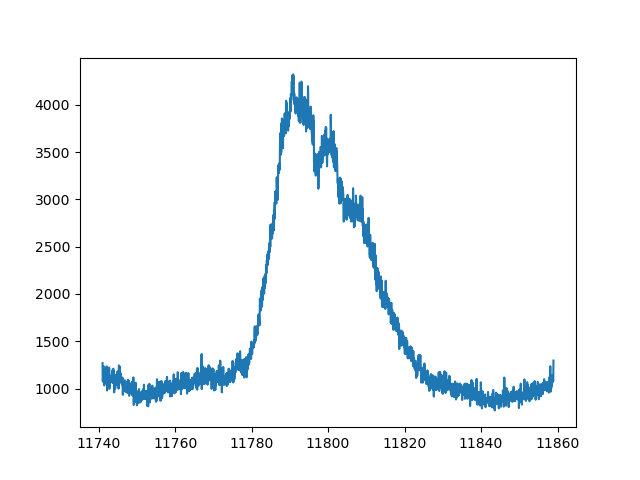

In [17]:
plt.figure()
plt.plot(Data_PSSS_Energy[0], Data_PSSS.mean(axis=0))
plt.show()

PBPS data have 5000 shots, avg intensity = 2.2189 +/- 0.4973
GasM data have 5000 shots, avg intensity = 4.6084 +/- 1.3576


<IPython.core.display.Javascript object>


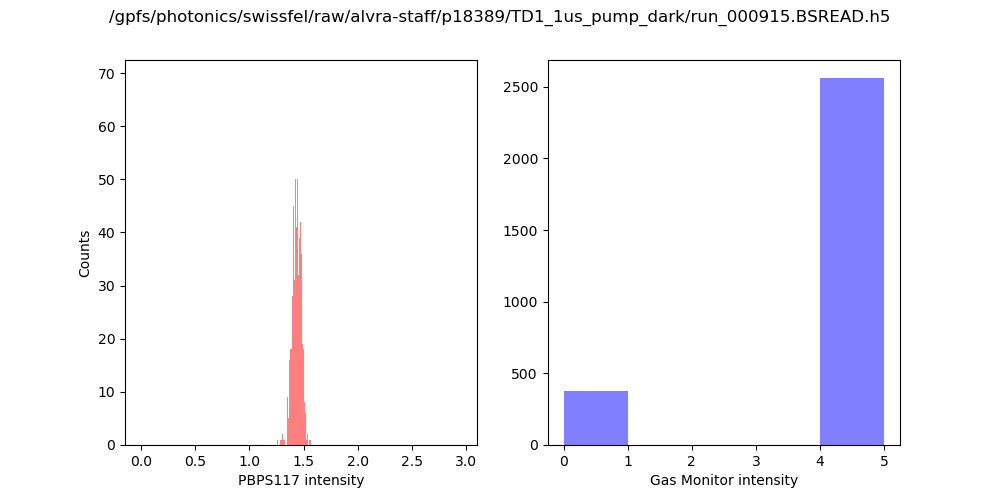

In [12]:
conditionGeneral = Data_PBPS117 > 0.0
Data_GasM_corr = Data_GasM[conditionGeneral]

print ("PBPS data have {} shots, avg intensity = {} +/- {}".format(len(Data_PBPS117),round(np.average(Data_PBPS117),4), round(np.std(Data_PBPS117),4)))
print ("GasM data have {} shots, avg intensity = {} +/- {}".format(len(Data_GasM),round(np.average(Data_GasM),4), round(np.std(Data_GasM),4)))

plt.figure(figsize = (10,5))

plt.suptitle(bsread_file, fontsize=12)
plt.subplot(1,2,1)
plt.hist(Data_PBPS122, bins =np.arange(0, np.max(Data_PBPS117),0.001), facecolor='red', alpha=0.5)
plt.ylabel ("Counts")
plt.xlabel("PBPS117 intensity")

plt.subplot(1,2,2)
plt.hist(Data_GasM, bins =np.arange(0,np.max(Data_GasM),1), facecolor='blue', alpha=0.5)

plt.xlabel("Gas Monitor intensity")
plt.show()
#print (IzeroFEL_pump_original.size, IzeroFEL_pump_shot.size)

In [ ]:
!h5ls -d "/sf/alvra/data/p17589/res/OATT53_tests/20200225_motor5_pos-15_12kev.h5/SARFE10-PBPG050:HAMP-INTENSITY-CAL"


In [35]:
number_shots = []
for i in range(0,10):
    filename = DIR + scan_name + "_step000%s.BSREAD.h5" % i
    data, pid = load_single_channel(filename, channel_LaserDiode, 18)
    number_shots.append(len(data))
    
